# Examples of IPython's (Jupyter) display widgets

## Table of Contents

[Motivation](#Motivation) - Why do we want to learn about this?


## Basics
 * [Markdown](#Markdown) - Adding Markdown programmatically, including object values/results and/or with Markdown $LaTeX$.
 * [Images](#Images) - Adding pictures, local and remote
 * [Audio and Video](#Audio-and-Video) - Adding an Audio or Video file
 * [Embed Youtube](#Embed-Youtube) - Have a youtube video you want to reference...

## Advanced
 * [Code Syntax Highlighting](#Code-Syntax-Highlighting) - How to display source with color (and even more dangourous and exciting tricks!)
 * [Progress Bars](#Progress-Bars) - How to show progress in some types of long running code situations
 * [Display Handles](#Display-Handles) - The way some things work, and how to get some of them to work another way
 
 
 ***

## Motivation
Back to [TOC](#Table-of-Contents)

For those more familiar with R, `.rmarkdown` provides a way to include `R` files and the results of the executed script(s) into a Markdown like document which can be knit and then presented to end users. 

Jupyter does include a way to render Markdown and other elements in code cells, rather than just having a Markdown cell. Code Input can then be hidden (leaving the Code Output) using `nbconvert` to render a final deliverable document.

To render a basic html without code input you can use:

```jupyter nbconvert --TemplateExporter.exclude_input=True {filename}```

While nbconvert can output `.pdf` files too, it becomes more complicated, as you will probably want to customize the templates for $LaTeX$ which are used for `.pdf` output.

If we just try to use the standard python `print()` function we do see something.

In [1]:
print("Hello, World!")

Hello, World!


This output doesn't really give us any formatting options or allow us to use calculated results in Markdown. Also, if you've written notebooks before, you might have seen how some types of output in loops gets overwritten. Let's start with the simplest use first and we'll work our way to this related topic of [Display Handles in the Advanced section](#Display-Handles).

Jupyter natively provides a function called `display()`. If you try to run this in the python REPL, you will get an error.

```
>>> display()
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
NameError: name 'display' is not defined
```

But in a notebook, we'll see some representation of the object added to the code cell's output.

In [2]:
display("Hello, World!")

'Hello, World!'

Notice, it has string single quotes around it. That's not really what we wanted. We'll need to look more closely at the [IPython.display](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html) namespace to move forward here.

## Markdown
Back to [TOC](#Table-of-Contents)


The simplest task is simply adding some markdown output to a code cell. Of course you could just change to a Markdown cell for this, but you know about the goals we're working towards.

In [3]:
from IPython.display import Markdown

In [4]:
display(Markdown("#### Hello, _World_!"))

#### Hello, _World_!

## _That's more like it!_

But what about results?

In [5]:
some_results = 1/3
display(Markdown("Here are some results... {}".format(some_results)))

Here are some results... 0.3333333333333333

This includes allowing us to use _**LaTeX**_ from code cells with some caveats.

In [6]:
display(Markdown("This is markdown with $LaTeX$ from a Code Cell."))
display(Markdown("$\\overrightarrow{x}'=A\\overrightarrow{x}+\\overrightarrow{g}$"))
display(Markdown("$\\beta = (X^{T}X)^{-1}X^{T}Y$"))

This is markdown with $LaTeX$ from a Code Cell.

$\overrightarrow{x}'=A\overrightarrow{x}+\overrightarrow{g}$

$\beta = (X^{T}X)^{-1}X^{T}Y$

That worked well. However, when we want to insert values, if we use `str.format()`, we'll need to watch mixing our `format()` `{}` and $LaTeX$ `{}`, since they have special meanings for both.

In [7]:
# notice this is a longer block of text we're writing. Here are two ways to break up longer strings in code cells.

# first you can use a \ at the end of the string, but you cannot put a comment between the end of a \ line ending
# and the next line of code

display(Markdown("Strings using format to {} like {:.2%}\
                programatically".format("add data", 0.0051)+ 

# you can however put a comment between a string you've close with "" or the returned string from "{}".format()
# and the beginning of the next line of code if you're concatenating strings with str()+str()
                 
                 " should build strings with $LaTeX$ incrementally."))

Strings using format to add data like 0.51%                programatically should build strings with $LaTeX$ incrementally.

## Images
Back to [TOC](#Table-of-Contents)
 
If you have a reference image, or have already generated an image in another script that you want to load into a notebook, or even a remote image the `IPython.display.Image()` class is for you!

In [8]:
from IPython.display import Image

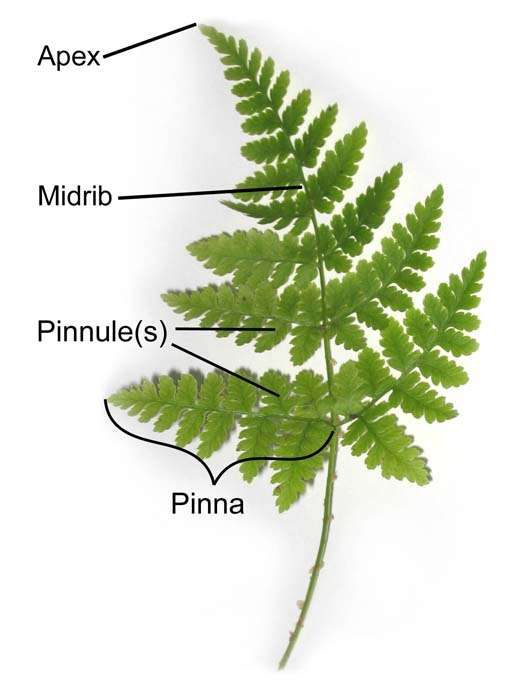

In [9]:
# image from USDA Forest Service
# Original source: https://www.fs.fed.us/wildflowers/beauty/ferns/images/structure/blade_pinna_pinnule.jpg
# Photo and Image rights: https://www.fs.fed.us/wildflowers/photos.shtml
local_image = Image("blade_pinna_pinnule_lg.jpg")
display(local_image)

Displaying remote images is just as easy, simply provide the url with the `Image(url="uri://path")` keyword argument.

In [10]:
remote_image = Image(url="https://via.placeholder.com/320x240")
display(remote_image)

## Audio and Video
Back to [TOC](#Table-of-Contents)

Sometimes, you might actually render audio or a video from some code you've written (yes, you can!) or have a video from another source, and you want to embed in a notebook.

In [11]:
from IPython.display import Audio, Video

Let's also look at a plot of small window over the 440Hz sin wave data generated at a sample rate 44100Hz.

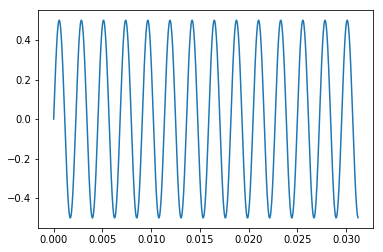

In [37]:
import numpy as np
import matplotlib.pyplot as plt

sample_rate = 44100
secs = 5
volume = 0.5
freq = 440
tau = np.linspace(0, secs, sample_rate*secs)

sin = volume*np.sin(2*np.pi*freq*tau)

window=int(sample_rate>>5)

plt.plot(tau[:window], sin[:window])

aud = Audio(sin, rate=44100)
display(aud)

display(Markdown("Let's also look at a plot of small window over the {}Hz sin wave data generated at a sample rate {}Hz.".format(freq, sample_rate)))

If you're interested in learning more about audio, you can check out even more examples [hear](https://musicinformationretrieval.com/ipython_audio.html) (yeah, pun intended).

In [13]:
#“Français : Gouttes d'encres dans un verre d'eau” by M0tty is licensed under CC BY-SA 4.0
local_vid = Video("Ink_drops_in_water.ogv.240p.vp9.webm")

display(local_vid)

In [14]:
remote_vid = Video("https://upload.wikimedia.org/wikipedia/commons/transcoded/d/d3/Ink_drops_in_water.ogv/Ink_drops_in_water.ogv.240p.vp9.webm")

display(remote_vid)

## Embed Youtube
Back to [TOC](#Table-of-Contents)

Sometimes you might want to reference a talk, or a video you or someone else has posted to YouTube. This can be very simply.

In [15]:
from IPython.display import YouTubeVideo

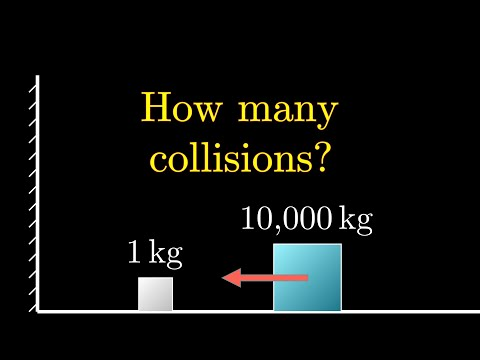

In [16]:
yt_vid = YouTubeVideo("HEfHFsfGXjs", start=22)
display(yt_vid)

## Code Syntax Highlighting
Back to [TOC](#Table-of-Contents)

Sometimes it'd be nice to not just have a preformatted text block like \`\`\` (triple backtick, the one that's below the ~ (tilde) on US keyboards) allows in Markdown, but a syntax highlighted block of code.

In [17]:
from IPython.display import Code

In [18]:
display(Markdown("Here's some syntax highlighted python 3 code"), Code("import os\n\nos.getcwd()", language="py3"))

Here's some syntax highlighted python 3 code

import os

os.getcwd()

In [19]:
source = "lambda_product.py"
display(Markdown("A specific source file, \"{}\", with syntax highlighting".format(source)), Code(source))

A specific source file, "lambda_product.py", with syntax highlighting

#! /usr/bin/env python3

import functools

#create [2,3,4]
input = [i for i in range(2,5)]

product = functools.reduce(lambda x,y: x*y, input)

And while this would be dangerous if you were to allow someone else to arbitrarily run whatever code they wanted outside of some "safe" sandboxed environment, it is possible to run this code in the current kernel and access values.

In [20]:
example = open(source)
ex_code = example.read()
example.close()

#in IPython/Jupyter there are also %load and %run magics, but here I will use the underlying python functionality

#this can be dangerous to allow people to arbitrarily do, but if you want to run your own code in this scenario... 
exec(ex_code)

#notice here, the product variable defined in the loaded script is now in this python kernels globals() and locals()
display(Markdown("`product` is now in `locals()`: {} `globals()`: {}".format("product" in locals().keys(), "product" in globals().keys())))

#so it's value can be referenced and displayed directly
display(Code(source), Markdown("Result: {}".format(product)))

`product` is now in `locals()`: True `globals()`: True

#! /usr/bin/env python3

import functools

#create [2,3,4]
input = [i for i in range(2,5)]

product = functools.reduce(lambda x,y: x*y, input)

Result: 24

## Progress Bars
Back to [TOC](#Table-of-Contents)

Sometimes, you're running an algorithm that takes a while, but you just have to let it run. It'd be nice to see that something is happening. Progress bars are made for this. You can also update messages, images and other objects, but one thing at a time.

In [21]:
from IPython.display import ProgressBar

In [22]:
#provide a sleep function to simulate a process taking awhile to complete
import time

In [23]:
pb = ProgressBar(10)

In [24]:
#if you want to look at the members, methods and magic this gives some info,
#and you can also go looking for the source on github.

#display(help(pb))

In [25]:
for i in pb:
    time.sleep(.1)

[============================================================] 10/10

If you want more control over when something updates (or it's not necessarily just showing progress of a loop), the 'old way' to use ProgressBar is more flexible (if you need it). The progress property of `IPython.display.ProgressBar` also allows us to reset, manually update or jump between progress positions. It is also possible to use `ipywidgets` and DisplayHandle if you want to keep diving deeper into the topic.

In [26]:
pb2 = ProgressBar(10)

pb2.display()

#do some linear work, like initializing
time.sleep(.8)
pb2.progress=+1

for i in range(2,5):
    time.sleep(.1)
    pb2.progress+=1
    
#do some linear work.... in between
time.sleep(.8)
pb2.progress+=1
    
for i in range(6,10):
    time.sleep(.1)
    pb2.progress+=1
    
#do some linear work, like cleaning up
time.sleep(.8)
pb2.progress+=1


time.sleep(1)
pb2.progress = 0

[                                                            ] 0/10

## Display Handles
Back to [TOC](#Table-of-Contents)

Display Handles are a big part of how this all works internally. This won't be exhaustive, but if you want to better understand, or are running into what appear to be some odd behaviors, this might help you as a starting point as to what to continue looking for. We'll start with an example of how we might find this immediately useful.

In [27]:
from IPython.display import DisplayHandle

As mentioned before, you might have seen some different types of behaviors using `matplotlib.pyplot` in a loop.

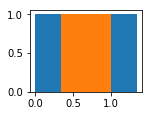

In [28]:
import matplotlib.pyplot as plt

bins = [i/3 for i in range(5)]

plt.figure(figsize=(2, 1.5))

for i in range(2):
    plt.hist([0+i/3,1-i/3], bins=bins)

plt.show()

Sometimes adding another set of data to the same graph is what you want, other times you want separate graphs.

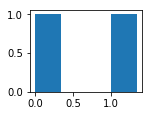

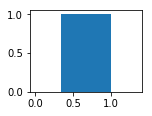

In [29]:
for i in range(2):
    plt.figure(figsize=(2,1.5))
    plt.hist([0+i/3,1-i/3], bins=bins)
    plt.show()

This is related to having more than one output in one code cell. We can accomplish something similar using `DisplayHandle()`.

What if we want to provide some text updates along with a progress bar, to let us know what's currently happening, maybe a sample of the current data?

In [30]:
pb3 = ProgressBar(10)

for i in pb3:
    display(Markdown("This is the {} iteration".format(i)))

[============================================================] 10/10

This is the 0 iteration

This is the 1 iteration

This is the 2 iteration

This is the 3 iteration

This is the 4 iteration

This is the 5 iteration

This is the 6 iteration

This is the 7 iteration

This is the 8 iteration

This is the 9 iteration

That wasn't what we really wanted... It's because each call to `display()` implicitly adds another Display Handle. We can manually create and reuse the same `DisplayHandle` object to get the effect we're looking for.

In [31]:
md = Markdown("This is some markdown with $LaTeX$, but it will be replaced soon.")
dh = DisplayHandle()
dh.display(md)

time.sleep(1.5)

for i in pb3:
    #notice typesetting takes a little while
    md = Markdown("This text has been updated for {} iterations".format(i))
    dh.update(md)
    #this sleep can be increased if you want to allow typesetting to complete
    time.sleep(.7)

This text has been updated for 9 iterations

[============================================================] 10/10

As you might have noticed, the $LaTeX$ might have taken a while to be typeset. This is just how it is, so creative use of display handles is probably what you'll want to look at.

In [32]:
DisplayHandle().display(Markdown("This is a Display Handle with some $LaTeX$ that wont need to be typeset everytime another handle in this code cell is updated"))
dh2 = DisplayHandle()

dh2.display(Markdown("This text's display handle will be updated"))

for i in range(5):
    time.sleep(.5)
    dh2.update(Markdown("Updated for {} iterations".format(i)))

This is a Display Handle with some $LaTeX$ that wont need to be typeset everytime another handle in this code cell is updated

Updated for 4 iterations

Exisiting instances still have views in previous cells they are used in.

In [33]:
# add a new display handle for progress bar 3 to this code cell, it still has one in the earlier code cell too
pb3.display()

[============================================================] 10/10

In [34]:
pb3.display()
pb3.progress = 0
for i in range(10):
    time.sleep(.1)
    pb3.progress += 1    

[============================================================] 10/10

This may explain why you would or wouldnt want to reuse a previous progress bar object, when it has a separate display.

Display handles don't just let you replace content with content of the same type either.

In [35]:
md2 = Markdown("This provides an example of the way DisplayHandles work.")
im = Image(url="https://via.placeholder.com/320x240")

dh2 = DisplayHandle()
dh3 = DisplayHandle()

dh2.display(im)
dh3.display(md2)

This provides an example of the way DisplayHandles work.

When you run the next cell, the display handles that already exist will be updated with the new object. This could be a completely new object, but they need not be. What do you expect will happen?

In [36]:
dh2.update(md2)
dh3.update(im)

You might have noticed or recognized this behavior earlier, but you should be confident about it now.

I hope this has helped to give some insight into some basics, and even some of the trickier topics of using Jupyter notebooks to create content-rich reports. Hosting a fully functioning interactive version of this sort of report/notebook, using `ipywidgets` to make interactive plots with sliders, and sites like [Binder](https://mybinder.org/) are probably the next things to look into. I haven't quite had time for that myself yet.